In [33]:
import random, math, pylab

In [4]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print (eigenvalues)
for iter in range(9):
    print (eigenvalues[iter])
    for i in range(9):
       print (eigenvectors[i][iter])


[-5.00000000e-01  1.00000000e+00  7.50000000e-01 -1.62384756e-16
  5.00000000e-01  2.50000000e-01  7.50000000e-01 -1.45897789e-17
  2.50000000e-01]
-0.5000000000000004
0.16666666666666682
-0.33333333333333315
0.1666666666666666
-0.33333333333333326
0.6666666666666667
-0.33333333333333326
0.1666666666666668
-0.33333333333333326
0.16666666666666682
0.9999999999999997
-0.3333333333333325
-0.33333333333333276
-0.33333333333333337
-0.333333333333333
-0.33333333333333315
-0.33333333333333387
-0.3333333333333335
-0.33333333333333387
-0.3333333333333341
0.7499999999999998
-0.5773502691896262
-0.28867513459481337
-1.7093670591943637e-16
-0.28867513459481325
-3.029604478929781e-16
0.28867513459481264
-5.323677864862594e-16
0.28867513459481253
0.5773502691896251
-1.6238475553275316e-16
0.40824829046386296
-0.40824829046386274
-4.0812930404386673e-16
-0.40824829046386285
2.4446611598207643e-16
0.40824829046386335
-6.118771026574319e-17
0.40824829046386296
-0.40824829046386313
0.5000000000000002
-0

In [6]:
position = numpy.zeros(9)
position[8] = 1.0
for t in range(100):
    print (t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position = numpy.dot(transfer, position)

0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
9    ['0.02459', '0.01241', '0.00054', '0.01241', '0.00

In [30]:
t = np.random.choice([-1,1])
print(t)

-1


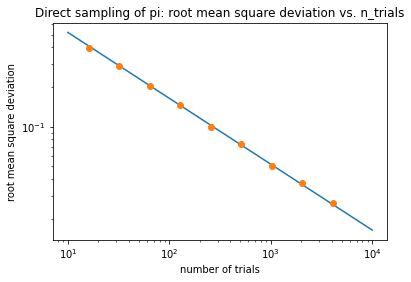

In [36]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)])
pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()


In [ ]:
#The line is added to the #23 line for letting the points stay above. Since the function of this paragraph is generating the plot, the first line of this old paragraph has a nearly similar function to the newly added. They are responsible for data interpretation. Hence, I added the line in this position.

#1.642 stand for standard deviation of our computation to actual pi value. The equation 1.642/sqrt(n_trials) is the equation of standard deviation of the mean (in our computation is actual pi).  Therefore, it represents the error in our computation to actual value. In the ideal case, follow this equation: When N go to infinity, sigma goes to 0. Hence, it happens for a super perfect computer.

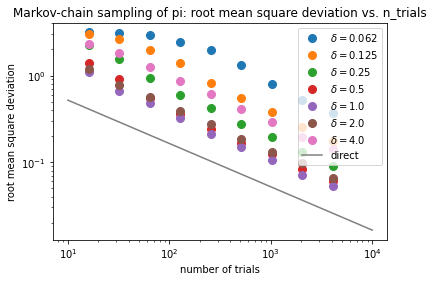

In [105]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [ ]:
#Delta = 1.0 gives the most precise result among provided.

#The reason is due to the acceptance rate at this scale being high compared to the jump path on the very small delta. Vice versa, the large jump also made us go outside the square, while the acceptance rate is small to allow these few jumps to be made.

#Direct sampling plays on discrete space, where it does not require memory for previous samples. Therefore, the direct sampling can fulfill the circle from independent directions, which faster and require fewer jumps than the Markov sampling.

In [144]:
n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials = 2**13
    mean=0
    for run in range(n_runs):
        ar =1- (markov_pi(n_trials, delta) / float(n_trials))
        mean += ar
    mean = mean/n_runs
    print("Delta: ",delta,"| Acceptance rate: ", mean)

Delta:  0.062 | Acceptance rate:  0.232546875
Delta:  0.125 | Acceptance rate:  0.21988330078125
Delta:  0.25 | Acceptance rate:  0.21769775390625
Delta:  0.5 | Acceptance rate:  0.21518212890625
Delta:  1.0 | Acceptance rate:  0.214502685546875
Delta:  2.0 | Acceptance rate:  0.21538037109375
Delta:  4.0 | Acceptance rate:  0.215809326171875


Delta | Acceptance rate
0.062  |  0.964875
0.125  |  0.93611376953125
0.25  |  0.87793408203125
0.5  |  0.76513427734375
1.0  |  0.561833984375
2.0  |  0.250888671875
4.0  |  0.0623173828125


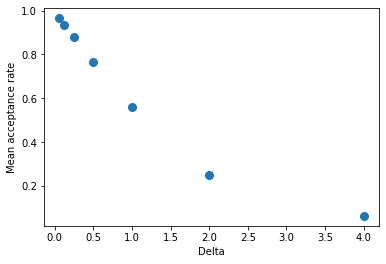

In [151]:
n_runs = 500
deltas = [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
mean_list = []
sigmas = []

def markov_ar(N, delta):
    x, y = 1.0, 1.0
    n_accepteds = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_accepteds += 1
    return n_accepteds

print("Delta | Acceptance rate")
for delta in deltas:
    n_trials = 2**12
    mean = 0.0
    sigma = 0.0
    for run in range(n_runs):
        ar= markov_ar(n_trials, delta) / float(n_trials)
        sigma+=(ar-math.pi/4)**2
        mean+=ar
    mean_list.append(mean/n_runs)
    sigmas.append(math.sqrt(sigma/(n_runs)))
    print(delta," | ",mean/n_runs)
pylab.plot(deltas, mean_list, 'o', ms = 8, label = '$\delta = $' + str(delta))
pylab.xlabel('Delta')
pylab.ylabel('Mean acceptance rate')
pylab.savefig('markov_sampling_mean_acceptance rate.png')

In [176]:
n_trials = 400000
n_hits = 0
var = 0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    var += (Obs - math.pi)**2
print (4.0 * n_hits / float(n_trials), math.sqrt(var / n_trials))

3.13445 1.6471412249725792


In [187]:
n_trials = 400000
n_hits = 0
sr = 0.0
var = 0.0
Obs = 0.0
mean = 0.0
n=0
for i in range(n_trials):
    n+=1
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0:
        Obs += 4.0
        n_hits += 1.0
    mean += (Obs*n_hits)
mean /= n
sr = (var)-(mean)**2
print (4.0 * n_hits / float(n_trials), mean, var, sr)

3.14178 131444315564.5216 0.0 -1.7277608094225536e+22


mean value=3.1470,calc error=0.0016, true error=0.0054
mean value=3.1470,calc error=0.0022, true error=0.0054
mean value=3.1470,calc error=0.0030, true error=0.0054
mean value=3.1470,calc error=0.0040, true error=0.0054
mean value=3.1470,calc error=0.0054, true error=0.0054
mean value=3.1470,calc error=0.0070, true error=0.0054
mean value=3.1470,calc error=0.0089, true error=0.0054
mean value=3.1470,calc error=0.0108, true error=0.0054
mean value=3.1470,calc error=0.0123, true error=0.0054
mean value=3.1470,calc error=0.0131, true error=0.0054
mean value=3.1470,calc error=0.0135, true error=0.0054
mean value=3.1470,calc error=0.0141, true error=0.0054
mean value=3.1470,calc error=0.0147, true error=0.0054
mean value=3.1470,calc error=0.0148, true error=0.0054
mean value=3.1470,calc error=0.0136, true error=0.0054
mean value=3.1470,calc error=0.0166, true error=0.0054
mean value=3.1470,calc error=0.0156, true error=0.0054
mean value=3.1470,calc error=0.0159, true error=0.0054
mean value

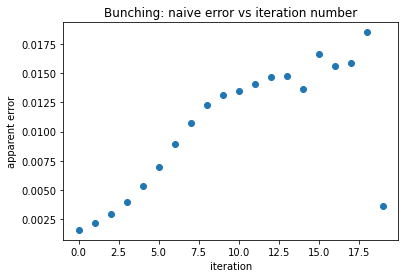

In [188]:
def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
    print ('mean value={0:6.4f},calc error={1:6.4f}, true error={2:6.4f}'.format(mean / float(N),errors[-1],abs(math.pi-mean / float(N))))
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number')
pylab.savefig('apparent_error_bunching.png')
pylab.show()

In [ ]:
#Upon the correlation time (t) of the bunching chain, there are 3 regimes of error regimes.
#1. Bunching intervals < t: the error is underestimated.
#2. Bunching intervals >= t: estimation approached the true error of our simulation by bunching of uncorrelated data does not change the mean.
#3. Disorder tail of the plot: the data remain uncorrelated, but the error estimate gets noisy.

#The absolute value of pi^est-pi is similar to the plateau error values.

In [192]:
n_trials = 400000
n_hits = 0
var = 0.0
so=0.0
so2=0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    so+=Obs
    so2+=Obs*Obs
m=so/n_trials
m2=so2/n_trials
var=m2-m**2
print ('<Obs> = ',m)
print ('<Obs^2> = ', m2)
print ('<Obs^2> - <Obs>^2 =', var)
print ('==> rms: ', math.sqrt(var))

<Obs> =  3.14636
<Obs^2> =  12.58544
<Obs^2> - <Obs>^2 = 2.6858587503999996
==> rms:  1.6388589781918392
